<a href="https://colab.research.google.com/github/phmouras/Critical-Phenomena-in-gravitational-collapse-via-spectral-methods/blob/main/KD_Initial_r2_nofilter_disserta%C3%A7%C3%A3o_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

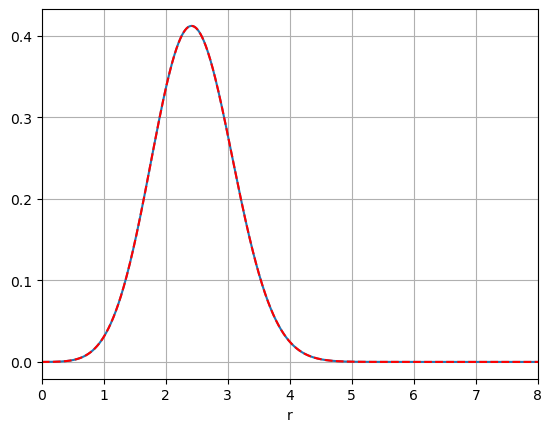

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

N = 200                                                   # Truncation ordem

L0 = 5                                             # Map parameter

col = np.cos(np.arange(2*N + 4)*math.pi /(2*N + 3))      # collocation points (Verificado)

colr = col[1:N+2]

r1 = L0 * colr/(np.sqrt(1-colr**2))                       # physical domain (Verificado)
r = np.flip(r1)

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Tchebyshev Polinomials):

SB = np.zeros([N+3,N+1])
rSB = np.zeros([N+3,N+1])
rrSB = np.zeros([N+3,N+1])


for i in range(N+1+1+1):
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))

for i in range(N+1+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2))

for i in range(N+1+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)


psi = SB[0:N+1,:]        # Base function
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]

# Initial conditions of Phi (Scalar field)

r0 = 2

sigma = 1

# no filter
A0 = 0.084  # 0.084 -> disperses ; 0.0852 -> colapse

# w/ filter
#A0 = 0.086  # 0.085 -> disperses ; 0.086 -> colapse

Phi_0 = A0*r**2*(np.exp(-(r-r0)**2/sigma**2)+np.exp(-(r+r0)**2/sigma**2))            # Phi initial data (Verificado)

inv_psi = np.linalg.inv(psi)

a0 = np.dot(Phi_0, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.000001,10,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2))

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)

psiplot = SBplot[0:(N+1),:]
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phi_plot0 = A0*rplot**2*(np.exp(-(rplot-r0)**2/sigma**2)+np.exp(-(rplot+r0)**2/sigma**2))

Phiplot = np.dot(a0, psiplot)

erro = Phi_plot0 - Phiplot

plt.plot(rplot, Phiplot, rplot, Phi_plot0, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)
plt.grid()
plt.show()




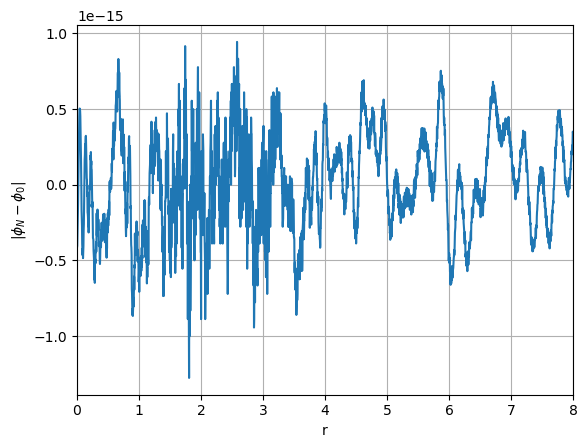

In [2]:
plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$|\phi_N - \phi_0|$")
plt.grid()
plt.show()

In [3]:
# Initial conditions for Alpha:

alpha0 = 1 - A0*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))

al0 = np.dot(alpha0 - 1, inv_psi)

# Initial values of Krr and K:

# Base functions:

SB1 = 1/2*(SB[1:(N+2),:] + SB[0:(N+1),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+2),:] + rSB[0:(N+1),:])
rrSB1 = 1/2*(rrSB[1:(N+2),:] + rrSB[0:(N+1),:])

inv_SB1 = np.linalg.inv(SB1)

K0 = A0/20*r**2*(np.exp(-(r)**2/sigma**2) + np.exp(-(r)**2/sigma**2))

fk0 = np.dot(K0, inv_SB1)

K = np.dot(fk0, SB1)

Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i]  =   0.001

N_int = 50

tol = 1e-18    # tolerance

n = 0
nf = 50

# Newton Raphson loop:

while n <= nf:
  Chi = np.dot(c0, psi)
  rChi = np.dot(c0 ,rpsi)
  rrChi = np.dot(c0, rrpsi)
  H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi - np.exp(4*Chi)*K**2/4 + 1/2*np.exp(4*Chi)*(Pi**2 + np.exp(-4*Chi)*rPhi**2)
  J1 = rChi*rpsi
  JH = 8*J1 + 4*rrpsi + 8/r*rpsi + 4*psi*np.exp(4*Chi)*K/4 - 2*psi*np.exp(4*Chi)*(Pi**2 + np.exp(-4*Chi)*rPhi**2) + 1/2*np.exp(4*Chi)*(4*psi*np.exp(-4*Chi)*rPhi**2)
  inv_JH = np.linalg.inv(JH)
  cnew = c0 - np.dot(H0, inv_JH)
  err = abs(c0 - cnew)
#  print(max(err))
  if  max(err) <= tol:
    break
  c0 = cnew    
  n = n + 1


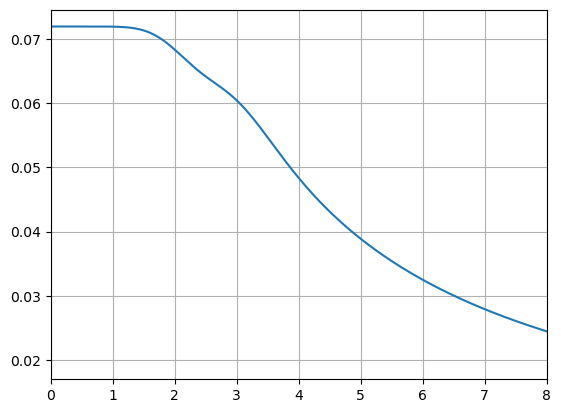

In [4]:

Chiplot = np.dot(c0, psiplot)

rrChiplot = np.dot(c0, rrpsiplot)

plt.plot(rplot,Chiplot)
plt.xlim(0,8)
plt.grid()
plt.show()

Field equations

In [5]:
# Base functions for Beta

SB2 = np.zeros([N+1,N+1])
rSB2 = np.zeros([N+1,N+1])
rrSB2 = np.zeros([N+1,N+1])

for i in range(N+1):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))

for i in range(N+1):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))

for i in range(N+1):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)



Quadrature Integration

In [6]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1)

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+3,Nq+1])                # Base function in quadrature points
qrSB = np.zeros([Nq+3,Nq+1])
qrrSB = np.zeros([Nq+3,Nq+1])




for i in range(Nq+1+1+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))

for i in range(Nq+1+1+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*(1+L0**2/rq**2))

for i in range(Nq+1+1+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)


qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi)


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:


qSB1 = 1/2*(qSB[1:(N+2),:] + qSB[0:(N+1),:])          # VERIFICADO
rqSB1 = 1/2*(qrSB[1:(N+2),:] + qrSB[0:(N+1),:])
rrqSB1 = 1/2*(qrrSB[1:(N+2),:] + qrrSB[0:(N+1),:])


#qKrr = np.dot(ck0, qSB1)

# Alpha na origem

psi_0 = np.zeros(N+1)     #psi(t,0)

for i in range(N+1):
  psi_0[i,] = np.sin((2*i+1)*math.pi/2)     # arccot(0) = Pi/2

#Alpha_0 = 1 + np.dot(al0, psi_0)

In [7]:
# Filtering

Nc = 0

Nf = N - Nc

coef_f = 36
s = 8

filter1 = np.ones(N+1)
#filter1 = np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)

In [8]:
# Runge Kutta 4th order

h = 0.0001   # step size
tf = 8

It = int(tf/h)

t = 0

epsilon0 = 3
eta0 = 0.7

Madm_error = []
Alpha_origin = []
phi_origin = []
L2HC = []
L2MC = []
phi_set = []

out_a = open('Alpha_origin.txt', 'a')
out_a.truncate(0)                        # arase the old datas and start the new ones

out_p = open('phi_origin.txt', 'a')
out_p.truncate(0)

V = 0

M0 = 2*np.dot(np.arange(1, 2*N + 2, 2), c0) # Madm(t = 0)

#np.random.seed(123)

while t <= tf:

  # First step
  Phi = np.dot(a0, psi)
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)

  Pi = np.dot(b0, psi)
  rPi= np.dot(b0, rpsi)

  Chi = np.dot(c0, psi)
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi)

  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)

  K = np.dot(fk0, SB1)
  rK = np.dot(fk0, rSB1)

  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1   
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r*rChi)*np.exp(4*Chi)*K/r + np.exp(4*Chi)*rK - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1)
  rKrr = np.dot(ck0, rSB1)

  Matrix_Beta = rSB2 - SB2/r
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr - 1/2*Alpha*K
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
    
  dal = np.dot(epsilon0*(rrAlpha + rAlpha*(2/r + 2*rChi))*np.exp(-4*Chi) - epsilon0*Alpha*(1.5*np.exp(-8*Chi)*Krr**2 + 0.5*K**2 - np.exp(-4*Chi)*K*Krr) - epsilon0*Alpha*Pi**2 - epsilon0*Beta*rK - epsilon0*eta0*K, inv_psi)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*rPhi*(2*Alpha/r + 2*Alpha*rChi) + np.exp(-4*Chi)*(Alpha*rrPhi + rAlpha*rPhi) + Alpha*K*Pi, inv_psi)
  dc = np.dot(1/2*rBeta + Beta*rChi - 1/2*Alpha*np.exp(-4*Chi)*Krr, inv_psi)
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
  dfk = np.dot(-eta0*K, inv_SB1)
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  M1 = h*(dal)
  P1 = h*(dfk)

  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi)
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi)
  qKrr = np.dot(ck0, qSB1)
  qK = np.dot(fk0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8/rq*rqChi + 3/4*np.exp(-4*qChi)*qKrr**2 - 1/4*np.exp(4*qChi)*qK**2 + 1/2*np.exp(4*qChi)*(qPi**2 + np.exp(-4*qChi)*rqPhi**2) - qK*qKrr/2
  L2 = (1/2*np.dot(H**2,wq_col))**1/2
  L2HC.append(L2)    # L2 error of HC

  # L2-error associated to the momentum constraint
#  rqKrr = np.dot(ck0, rqSB1)
#  M = 2*rqChi*qKrr + rqKrr + 3/rq*qKrr + qPi*rqPhi*np.exp(4*qChi)
#  L2MC.append((1/2*np.dot(M**2,wq_col))**1/2)    # L2 error of HC

  # Alpha origin
  Alpha_0 = 1 + np.dot(al0, psi_0)
  Alpha_origin.append(Alpha_0)                   # = Alphacenter in matlab
  out_a.write(str(t) + " " + str(Alpha_0))
  out_a.write(',\n')

  # Phi origin:
  phi_0 = np.dot(a0, psi_0)
  phi_origin.append(phi_0)
  out_p.write(str(t) + " " + str(phi_0))
  out_p.write(',\n')

  # Error ADM mass:
  Madm = 2*np.dot(np.arange(1, 2*N + 2, 2), c0)
  Madm_pc = abs(Madm - M0)/M0 * 100
  Madm_error.append(Madm_pc)

  # Second step
  Phi = np.dot(a0 + L1/2, psi)
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi)

  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)

  Chi = np.dot(c0 + K1/2, psi)
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)

  Alpha = 1 + np.dot(al0 + M1/2, psi)
  rAlpha = np.dot(al0 + M1/2, rpsi)
  rrAlpha = np.dot(al0 + M1/2, rrpsi)

  K = np.dot(fk0 + P1/2, SB1)
  rK = np.dot(fk0 + P1/2, rSB1)

  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r*rChi)*np.exp(4*Chi)*K/r + np.exp(4*Chi)*rK - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1)
  rKrr = np.dot(ck0, rSB1)

  Matrix_Beta = rSB2 - SB2/r
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr - 1/2*Alpha*K
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)

  dal = np.dot(epsilon0*(rrAlpha + rAlpha*(2/r + 2*rChi))*np.exp(-4*Chi) - epsilon0*Alpha*(1.5*np.exp(-8*Chi)*Krr**2 + 0.5*K**2 - np.exp(-4*Chi)*K*Krr) - epsilon0*Alpha*Pi**2 - epsilon0*Beta*rK - epsilon0*eta0*K, inv_psi)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*rPhi*(2*Alpha/r + 2*Alpha*rChi) + np.exp(-4*Chi)*(Alpha*rrPhi + rAlpha*rPhi) + Alpha*K*Pi, inv_psi)
  dc = np.dot(1/2*rBeta + Beta*rChi - 1/2*Alpha*np.exp(-4*Chi)*Krr, inv_psi)
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
  dfk = np.dot(-eta0*K, inv_SB1)
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)
  M2 = h*(dal)
  P2 = h*(dfk)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi)

  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)

  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)

  Alpha = 1 + np.dot(al0 + M2/2, psi)
  rAlpha = np.dot(al0 + M2/2, rpsi)
  rrAlpha = np.dot(al0 + M2/2, rrpsi)

  K = np.dot(fk0 + P2/2, SB1)
  rK = np.dot(fk0 + P2/2, rSB1)

  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r*rChi)*np.exp(4*Chi)*K/r + np.exp(4*Chi)*rK - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1)
  rKrr = np.dot(ck0, rSB1)

  Matrix_Beta = rSB2 - SB2/r
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr - 1/2*Alpha*K
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)

  dal = np.dot(epsilon0*(rrAlpha + rAlpha*(2/r + 2*rChi))*np.exp(-4*Chi) - epsilon0*Alpha*(1.5*np.exp(-8*Chi)*Krr**2 + 0.5*K**2 - np.exp(-4*Chi)*K*Krr) - epsilon0*Alpha*Pi**2 - epsilon0*Beta*rK - epsilon0*eta0*K, inv_psi)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*rPhi*(2*Alpha/r + 2*Alpha*rChi) + np.exp(-4*Chi)*(Alpha*rrPhi + rAlpha*rPhi) + Alpha*K*Pi, inv_psi)
  dc = np.dot(1/2*rBeta + Beta*rChi - 1/2*Alpha*np.exp(-4*Chi)*Krr, inv_psi)
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
  dfk = np.dot(-eta0*K, inv_SB1)
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db)
  M3 = h*(dal)
  P3 = h*(dfk)

  # Forth step
  Phi = np.dot(a0 + L3, psi)
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi)

  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)

  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)

  Alpha = 1 + np.dot(al0 + M3, psi)
  rAlpha = np.dot(al0 + M3, rpsi)
  rrAlpha = np.dot(al0 + M3, rrpsi)

  K = np.dot(fk0 + P3, SB1)
  rK = np.dot(fk0 + P3, rSB1)

  Matrix_Krr = 2*rChi*SB1  + rSB1  + 3/r*SB1   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r*rChi)*np.exp(4*Chi)*K/r + np.exp(4*Chi)*rK - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1)
  rKrr = np.dot(ck0, rSB1)

  Matrix_Beta = rSB2 - SB2/r
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr - 1/2*Alpha*K
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)

  dal = np.dot(epsilon0*(rrAlpha + rAlpha*(2/r + 2*rChi))*np.exp(-4*Chi) - epsilon0*Alpha*(1.5*np.exp(-8*Chi)*Krr**2 + 0.5*K**2 - np.exp(-4*Chi)*K*Krr) - epsilon0*Alpha*Pi**2 - epsilon0*Beta*rK - epsilon0*eta0*K, inv_psi)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*rPhi*(2*Alpha/r + 2*Alpha*rChi) + np.exp(-4*Chi)*(Alpha*rrPhi + rAlpha*rPhi) + Alpha*K*Pi, inv_psi)
  dc = np.dot(1/2*rBeta + Beta*rChi - 1/2*Alpha*np.exp(-4*Chi)*Krr, inv_psi)
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
  dfk = np.dot(-eta0*K, inv_SB1)
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)
  M4 = h*(dal)
  P4 = h*(dfk)

  t = t + h
#  print(f't = {t}')

  # Evolution functions
  a0 = filter1*(a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4))
  b0 = filter1*(b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4))
  c0 = filter1*(c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4))
  al0 = al0 + 1/6 * (M1 + 2*M2 + 2*M3 + M4)
  fk0 = fk0 + 1/6 * (P1 + 2*P2 + 2*P3 + P4)

  phi_set.append(np.dot(a0, psiplot))
    
  if Alpha_0 > 1:
    break
  elif Alpha_0 < 0:   
    break

t1 = np.linspace(0, tf, len(Alpha_origin))




In [ ]:
# Searching for critical amplitude:

#Alpha_origin_disp = Alpha_origin
Alpha_origin_collapse = Alpha_origin

#mask = t1 <= 7.8

t_alpha_collapse = np.linspace(0,  t1, len(Alpha_origin_collapse))

#plt.plot(t1, Alpha_origin_disp, color = "g", label = f"$A_0$ = 0.084")
plt.plot(t_alpha_collapse, Alpha_origin_collapse, color = "y", label = f"$A_0$ = 0.0852")
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.xlim(0,12)
plt.grid()
plt.legend()

In [ ]:
# Phi origin

plt.plot(t1, phi_origin, color = "b", label = " = {:}".format(A0))
plt.title("Phi na origem para L0 = 2 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")
plt.grid()
plt.legend()

In [ ]:
# Erro L2 of Hamiltonian constraint

plt.plot(t1,L2HC)
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
plt.grid()
plt.title("log(L2Hc) para $N = 200$, $L_0 = 20$ e $A_0 = $")

# K-Driver slicing results: Dispersion

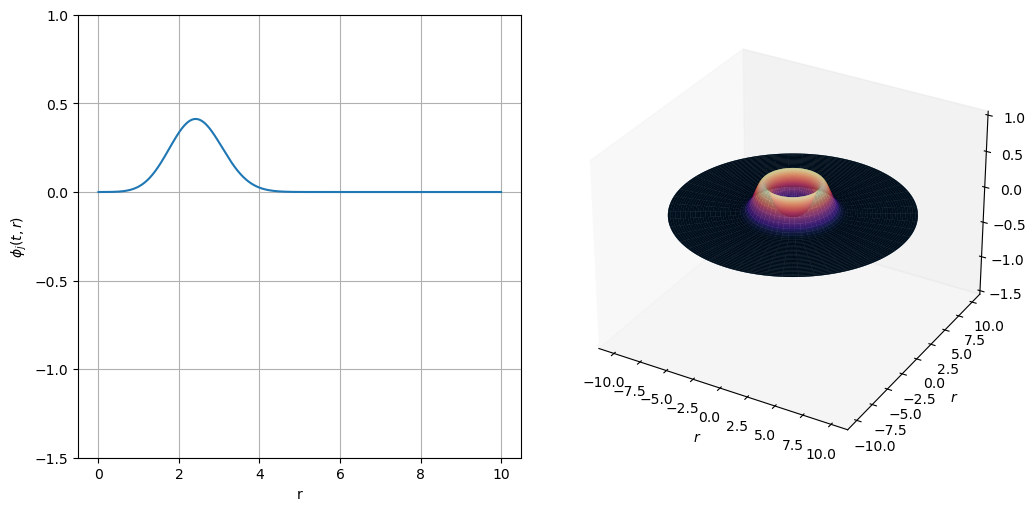

In [11]:
# Plot 3D from scalar field at t = constant: Dispersion case

from mpl_toolkits.mplot3d import Axes3D

phi_set_disp = phi_set


fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')

M = 3000

y = phi_set_disp[0] # for t 10s => i = 120000 ; 1s => i = 17000
x = rplot
theta = np.linspace(0, 2*np.pi, M)    # Revolution of f(phi,r)

xn = np.outer(x, np.cos(theta))
yn = np.outer(x, np.sin(theta))
zn = np.zeros_like(xn)

for i in range(len(x)):
    zn[i,:] = np.full_like(zn[0,:], y[i])


ax2.plot_surface(xn, yn, zn)

#ax2.plot_surface(xn, yn, zn)
ax2.plot_surface(xn, yn, zn, rstride = 5, cstride = 5, cmap = 'magma', edgecolor = 'none')
ax1.plot(x, y)
ax1.grid()
ax1.set_xlabel('r')
ax1.set_ylim(-1.5, 1)
ax1.set_ylabel('$\phi_j(t,r)$')
#ax1.set_aspect('equal')
ax1.set_box_aspect(1)
ax2.set_xlabel('$r$')
ax2.set_ylabel('$r$')
ax2.set_zlim(-1.5, 1)
#ax2.set_zlabel('$\phi$')




plt.subplots_adjust(wspace=0.1)

ax2.grid(False)
#plt.axis('off')
plt.show()

In [ ]:
# 2D Animation plot for Phi: Scalar Field dispersion

from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib as mpl


fig = plt.figure()
ax = plt.axes(xlim=(0, 10),ylim = (-1.5, 1.5))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
time_text = ax.text(0.02, 0.9, '', transform=ax.transAxes)
x = rplot

def init():
    line.set_data([], [])
    initA0_text.set_text('')
    time_text.set_text('')
    return line,

def animate(i):
  y = phi_set_disp[i]
  line.set_data(x, y)
  initA0_text.set_text("$A_0 = {:}$".format(A0))
  time_text.set_text("Time ="+str(round(h+h*i,2)))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.05, blit=True)


anim.save("animation_KD_dispersion.mp4")



In [ ]:
# 3D phi animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

theta = np.linspace(0, 2 * np.pi, M)  # Revolution of f(phi,r)

fig = plt.figure(figsize=(12, 6))
ax2 = fig.add_subplot(111, projection='3d')

xn = np.outer(rplot, np.cos(theta))
yn = np.outer(rplot, np.sin(theta))
zn = np.zeros_like(xn)

ax2.set_xlabel('$r$')
ax2.set_ylabel('$r$')
ax2.set_zlim(-1.5, 1)

# It = 60.000 for t = 12

def update_plot(i):
    ax2.cla()  # Use cla() instead of clear() for better performance
    ax2.set_xlabel('$r$')
    ax2.set_ylabel('$r$')
    ax2.set_zlim(-1.5, 1)

    idx = i*5         # computa frames multiplos de 5 
    y = phi_set_disp[idx]
    x = rplot
    
    for j in range(len(x)):
        zn[j, :] = np.full_like(zn[0], y[j])
    
    ax2.plot_surface(xn, yn, zn, rstride=5, cstride=5, cmap='magma', edgecolor='none')
    ax2.grid(False)

    # Imprimir o índice do frame atual
    print(f"i = {idx}")

ani = FuncAnimation(fig, update_plot, frames=len(phi_set), interval=100, blit=False)
ani.save("3D_animation_KD_dispersion.mp4", writer='ffmpeg', fps=30)


plt.show()



        

i = 0
i = 0
i = 5
i = 10
i = 15
i = 20
i = 25
i = 30
i = 35
i = 40
i = 45
i = 50
i = 55
i = 60
i = 65
i = 70
i = 75
i = 80
i = 85
i = 90
i = 95
i = 100
i = 105
i = 110
i = 115
i = 120
i = 125
i = 130
i = 135
i = 140
i = 145
i = 150
i = 155
i = 160
i = 165
i = 170
i = 175
i = 180
i = 185
i = 190
i = 195
i = 200
i = 205
i = 210
i = 215
i = 220
i = 225
i = 230
i = 235
i = 240
i = 245
i = 250
i = 255
i = 260
i = 265
i = 270
i = 275
i = 280
i = 285
i = 290
i = 295
i = 300
i = 305
i = 310
i = 315
i = 320
i = 325
i = 330
i = 335
i = 340
i = 345
i = 350
i = 355
i = 360
i = 365
i = 370
i = 375
i = 380
i = 385
i = 390
i = 395
i = 400
i = 405
i = 410
i = 415
i = 420
i = 425
i = 430
i = 435
i = 440
i = 445
i = 450
i = 455
i = 460
i = 465
i = 470
i = 475
i = 480
i = 485
i = 490
i = 495
i = 500
i = 505
i = 510
i = 515
i = 520
i = 525
i = 530
i = 535
i = 540
i = 545
i = 550
i = 555
i = 560
i = 565
i = 570
i = 575
i = 580
i = 585
i = 590
i = 595
i = 600
i = 605
i = 610
i = 615
i = 620
i = 625
i = 630


i = 4675
i = 4680
i = 4685
i = 4690
i = 4695
i = 4700
i = 4705
i = 4710
i = 4715
i = 4720
i = 4725
i = 4730
i = 4735
i = 4740
i = 4745
i = 4750
i = 4755
i = 4760
i = 4765
i = 4770
i = 4775
i = 4780
i = 4785
i = 4790
i = 4795
i = 4800
i = 4805
i = 4810
i = 4815
i = 4820
i = 4825
i = 4830
i = 4835
i = 4840
i = 4845
i = 4850
i = 4855
i = 4860
i = 4865
i = 4870
i = 4875
i = 4880
i = 4885
i = 4890
i = 4895
i = 4900
i = 4905
i = 4910
i = 4915
i = 4920
i = 4925
i = 4930
i = 4935
i = 4940
i = 4945
i = 4950
i = 4955
i = 4960
i = 4965
i = 4970
i = 4975
i = 4980
i = 4985
i = 4990
i = 4995
i = 5000
i = 5005
i = 5010
i = 5015
i = 5020
i = 5025
i = 5030
i = 5035
i = 5040
i = 5045
i = 5050
i = 5055
i = 5060
i = 5065
i = 5070
i = 5075
i = 5080
i = 5085
i = 5090
i = 5095
i = 5100
i = 5105
i = 5110
i = 5115
i = 5120
i = 5125
i = 5130
i = 5135
i = 5140
i = 5145
i = 5150
i = 5155
i = 5160
i = 5165
i = 5170
i = 5175
i = 5180
i = 5185
i = 5190
i = 5195
i = 5200
i = 5205
i = 5210
i = 5215
i = 5220
i = 5225
i

# K-Driver slicing results: Collapse

In [ ]:
# Plot 3D from scalar field at t = constant: Collapse case

from mpl_toolkits.mplot3d import Axes3D

phi_set_collapse = phi_set

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121, adjustable='box')  # Adjust proportions as needed
ax2 = fig.add_subplot(122,projection='3d')

M = 3000

y = phi_set_collapse[120000] # 7 plots from t = 0, 2, 4, ..., 12
x = rplot
theta = np.linspace(0, 2*np.pi, M)    # Revolution of f(phi,r)

xn = np.outer(x, np.cos(theta))
yn = np.outer(x, np.sin(theta))
zn = np.zeros_like(xn)

for i in range(len(x)):
    zn[i,:] = np.full_like(zn[0,:], y[i])


ax2.plot_surface(xn, yn, zn)

#ax2.plot_surface(xn, yn, zn)
ax2.plot_surface(xn, yn, zn, rstride = 5, cstride = 5, cmap = 'magma', edgecolor = 'none')
ax1.plot(x, y)
ax1.grid()
ax1.set_xlabel('r')
ax1.set_ylim(-1.5, 1)
ax1.set_ylabel('$\phi_j(t,r)$')
#ax1.set_aspect('equal')
ax1.set_box_aspect(1)
ax2.set_xlabel('$r$')
ax2.set_ylabel('$r$')
ax2.set_zlim(-1.5, 1)
#ax2.set_zlabel('$\phi$')




plt.subplots_adjust(wspace=0.1)

ax2.grid(False)
#plt.axis('off')
plt.show()

NameError: name 'phi_set_collapse' is not defined

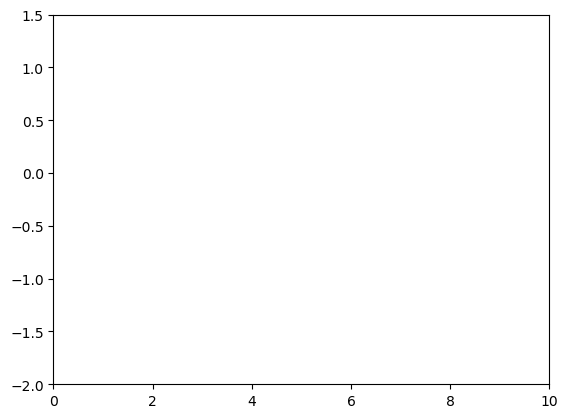

In [10]:
# Animation plot for Phi: Scalar Field collapse

from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib as mpl


fig = plt.figure()
ax = plt.axes(xlim=(0, 10),ylim = (-2, 1.5))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
time_text = ax.text(0.02, 0.9, '', transform=ax.transAxes)
x = rplot

def init():
    line.set_data([], [])
    initA0_text.set_text('')
    time_text.set_text('')
    return line,

def animate(i):
  y = phi_set_collapse[i]
  line.set_data(x, y)
  initA0_text.set_text("$A_0 = {:}$".format(A0))
  time_text.set_text("Time ="+str(round(h+h*i,2)))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.2, blit=True)

#HTML(anim.to_html5_video())

anim.save("animation_KD_collapse.mp4")




In [ ]:
# 3D phi animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

theta = np.linspace(0, 2 * np.pi, M)  # Revolution of f(phi,r)

fig = plt.figure(figsize=(12, 6))
ax2 = fig.add_subplot(111, projection='3d')

xn = np.outer(rplot, np.cos(theta))
yn = np.outer(rplot, np.sin(theta))
zn = np.zeros_like(xn)

ax2.set_xlabel('$r$')
ax2.set_ylabel('$r$')
ax2.set_zlim(-1.5, 1)

def update_plot(i):
    ax2.clear()  # Use cla() instead of clear() for better performance
    ax2.set_xlabel('$r$')
    ax2.set_ylabel('$r$')
    ax2.set_zlim(-1.5, 1)

    idx = i*5         # computa frames multiplos de 5 
    y = phi_set_collapse[idx]
    x = rplot
    
    for j in range(len(x)):
        zn[j, :] = np.full_like(zn[0], y[j])
    
    ax2.plot_surface(xn, yn, zn, rstride=5, cstride=5, cmap='magma', edgecolor='none')
    ax2.grid(False)

    # Imprimir o índice do frame atual
    print(f"i = {idx}")

ani = FuncAnimation(fig, update_plot, frames=len(phi_set), interval=100, blit=False)
ani.save("3D_animation_KD_collapse.mp4", writer='ffmpeg', fps=30)


plt.show()



        